In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('California_Houses.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [4]:
X = df.iloc[:,1:]
X.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [5]:
y = df.iloc[:, 0]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: Median_House_Value, dtype: float64

In [6]:
#Split data to train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 13) (16512,)
(4128, 13) (4128,)


In [8]:
#Future scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, :] = sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = sc.transform(X_test.iloc[:, :])

In [9]:
X_train.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
10729,1.450236,-0.688155,0.262427,0.077287,-0.324491,0.066155,-0.949268,0.846489,-0.662796,-0.841707,-0.964448,0.933347,0.931900
19133,-0.770015,-1.005762,0.187391,0.165727,0.219506,0.309107,1.275693,-1.575314,-0.341815,1.435410,1.402161,-0.990591,-1.270394
14990,-0.049297,0.582276,-0.281697,-0.407936,-0.255045,-0.380135,-1.361472,1.270929,-0.548634,-0.333412,-1.328113,1.512169,1.434294
446,0.002832,1.852707,-0.804186,-0.816670,-0.928142,-0.784173,1.050855,-1.360598,-0.725595,1.172997,1.177420,-1.290518,-1.479970
3209,-0.451961,0.264668,-0.529361,-0.611108,-0.447358,-0.625727,0.329499,-0.022364,2.304389,0.052291,0.217030,-0.540932,-0.357787


In [10]:
X_test.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
1667,1.136988,-1.085164,-0.226456,-0.508327,-0.297781,-0.467281,1.121117,-1.320650,-0.775438,1.205313,1.206046,-1.234833,-1.411387
5165,-1.003195,0.820482,-0.433150,-0.266910,0.035206,-0.237533,-0.785324,0.636766,-0.540100,-1.039255,-0.776725,0.681424,0.713161
5151,-1.405172,0.820482,-0.512329,-0.434229,-0.244361,-0.380135,-0.785324,0.646753,-0.513271,-1.041356,-0.780602,0.686867,0.717910
11989,0.742722,-1.164566,5.026969,3.626825,5.494770,4.185761,-0.766587,1.021258,0.316124,-0.817199,-0.870627,0.887941,0.892008
8331,-1.306355,0.582276,-0.205281,0.223093,0.524003,0.216679,-0.794692,0.631772,-0.585387,-1.029524,-0.780813,0.686584,0.717600


In [11]:
rf = RandomForestRegressor().fit(X_train, y_train)
rf2 =RandomForestRegressor().fit(X_test, y_test)
print("Random forest model, Train R^2:", rf.score(X_train, y_train))
print("Random forest model, Test R^2:", rf2.score(X_test, y_test))

Random forest model, Train R^2: 0.9766450435520034
Random forest model, Test R^2: 0.970931822867162


In [24]:
lr = LinearRegression().fit(X_train, y_train)
lr2 = LinearRegression().fit(X_test, y_test)
print("Linear regression model, Train R^2:", lr.score(X_train, y_train))
print("Linear regression model, Test R^2:", lr2.score(X_test, y_test))

Linear regression model, Train R^2: 0.6442188589575928
Linear regression model, Test R^2: 0.6569254089271666


In [13]:
from sklearn.linear_model import Lasso
la = Lasso().fit(X_train, y_train)
la2=Lasso().fit(X_test, y_test)
print("Lasso model, Train R^2:", la.score(X_train, y_train)) 
print("Lasso regression model, Test R^2:", la2.score(X_test, y_test))

Lasso model, Train R^2: 0.6442182921381185
Lasso regression model, Test R^2: 0.6569250141044274


/Users/arlenerivera/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.496e+13, tolerance: 2.197e+10
  model = cd_fast.enet_coordinate_descent(
/Users/arlenerivera/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.131e+12, tolerance: 5.507e+09
  model = cd_fast.enet_coordinate_descent(


In [14]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [15]:
from xgboost import XGBRegressor

regressor = XGBRegressor()
xg=regressor.fit(X_train, y_train)
xg1=regressor.fit(X_test, y_test)

In [16]:
print("XGBregressor model, Train R^2:", xg.score(X_train, y_train))
print("XGBregressor model, Test R^2:", xg1.score(X_test, y_test))

XGBregressor model, Train R^2: 0.804403929721598
XGBregressor model, Test R^2: 0.9845110544944158


In [17]:
#R^2 value on xgboost
from sklearn.metrics import r2_score 
y_pred_xgboost = regressor.predict(X_test)
r2_score(y_test, y_pred_xgboost)

0.9845110544944158

In [18]:
feature_importance = dict(zip(df.columns, list(rf.feature_importances_)))
feature_importance

{'Median_House_Value': 0.46995652368658714,
 'Median_Income': 0.029010150156953178,
 'Median_Age': 0.019414160311301894,
 'Tot_Rooms': 0.01527473890395033,
 'Tot_Bedrooms': 0.021614882221773605,
 'Population': 0.013466858994402597,
 'Households': 0.05832937965192493,
 'Latitude': 0.036994435367031495,
 'Longitude': 0.2088449734511254,
 'Distance_to_coast': 0.031096467694653292,
 'Distance_to_LA': 0.028961185259251603,
 'Distance_to_SanDiego': 0.02819324975772442,
 'Distance_to_SanJose': 0.03884299454331992}

<AxesSubplot:title={'center':'Feature Importance (RandomForest)'}, ylabel='Relative Importance'>

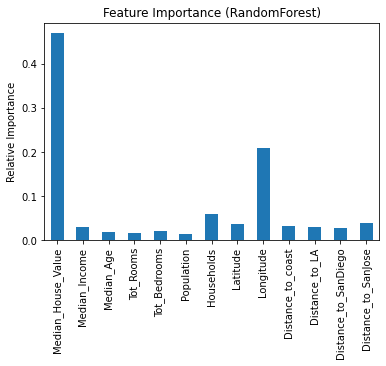

In [19]:
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot.bar(title="Feature Importance (RandomForest)", ylabel='Relative Importance', legend=False)

In [20]:
#rf2 =RandomForestRegressor().fit(X_test, y_test)
y_pred_random=rf2.predict(X_test)

Text(0.5, 1.0, 'Random Forest: Predictions vs Observed Values')

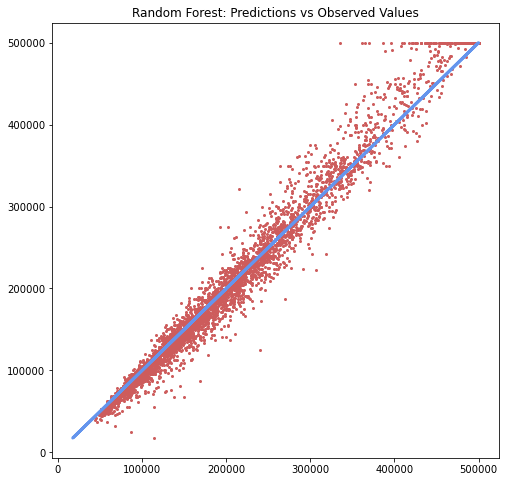

In [21]:
plt.subplots(figsize=(8,8))
plt.scatter(y_pred_random,y_test,s=4, color='indianred')
plt.plot(y_test, y_test,color='cornflowerblue', linewidth=3)
plt.title('{}: Predictions vs Observed Values'.format("Random Forest"))

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
print("Accuracy score for {} is {:.2f}, RMSE is {:.2f}".
      format("Random Forest",r2_score(y_test, y_pred_random),
             mean_squared_error(y_test, y_pred_random, squared=False)))

Accuracy score for Random Forest is 0.97, RMSE is 19693.09
